## Tilting Point Data Scientist Technical Challenge
#### 1. You are free to use any package that you deem necessary, the basic pacakge is already imported
#### 2. After each question, there will be an answer area, you can add as many cells as you deem necessary between answer and following question
#### 3. You have 1.5 hours to complete the challenge, quality will be preferred over quantity

In [1]:
from pandas import *
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
#Please import your own package here

### Question 1: SQL

country|longname|Network|platform|install_time|User_ID|paid
---|-----------------------------------------------------------------------------------------
TR|com.thirdtime.derbyking|Organic|iOS|5/4/2016 13:36|D5655090-33CB-49B0-A8C4-FCC493AD33F4|0
US|com.thirdtime.derbyking|Facebook|iOS|6/17/2016 1:57|CBC92E11-F642-46D3-93CF-7F3A182B20BB|0
CN|com.spotlight.tropicalwars|Organic|iOS|4/27/2016 14:52|B8331894-4BFC-4714-A232-FA65F4401F29|0
DE|com.thirdtime.derbyking|Facebook|iOS|6/16/2016 11:37|90FCCFF2-E268-4466-9D22-99CCCEF9A4AB|0
FR|com.spotlight.languinis|Organic|iOS|5/15/2015 7:52|50D23049-BAA3-4755-BECA-1D3F8EE81F80|0.65
BE|com.thirdtime.derbyking|Facebook|iOS|6/14/2016 17:04|D7AFBF03-C5F6-44FF-86E7-40A9840D2023|0
FR|com.thirdtime.derbyking|Facebook|iOS|6/17/2016 8:44|B1596A58-C7CD-4BDF-BEE7-7B0DBD4FDA2F|0
US|com.thirdtime.derbyking|Facebook|iOS|6/13/2016 1:15|9826D3AA-5F43-416D-B440-2EC5750EB529|0
                                                                   ...
                                                                   ...
                                                                   ...


Given excerpt of data above, Write a query to create a report, output should look like below:

(if long name contains derbyking, then game name=’Photo Finish Horse Racing’,

if long name contains languinis, then game name=’Languinis’,

if long name contains tropicalwars, then game name=’Tropical Wars’)

Game Name|Network|Unique Players Count (Using User_id)|Uniqu Players in US|Unique Paid Players|Total Revenue
---------------|----
Photo Finish Horse Racing|Facebook|400|100|1|100.55
Photo Finish Horse Racing|Instagram|300|200|0|0
Languinis|Facebook|20|10|4|0.65
Languinis|Organic|10|5|1|0
Tropical Wars|Facebook|40|20|3|5.49



#### Please write the SQL code below, note there is no interpreter for this one

Answer:

Create table Report (Game_Name char (50)) as

Select *,  (case

when charindex(‘derbyking’,@longname)  > 0 then ‘Photo Finish Horse Racing’

when charindex(‘languinis’,@longname)  > 0 then ‘Languinis’

when charindex(‘tropicalwars’,@longname)  > 0 then ‘Tropical Wars’

end) as Game_Name,

count (distinct User_ID ) as Unique_Players_Count,

count (distinct User_ID (case when country = ‘US’ then User_ID end) as
Unique_Players_in_US,

count (distinct User_ID (case when paid > 0 then User_ID end) as
Unique_Paid_Players,

sum(paid)

from Old_table

group by Game_Name Network;

### Question 2: Statistics

In [2]:
test_data = read_excel('Statistical test.xlsx')
test_data

,Experience Name,Platform,Experience,Unique User,Payer,Total Revenue,Purchase,Day1 Retention,Day3 Retention,Day7 Retention,Day14 Retention
0,WW_confirm_purchase_OFF_control_A,android,458,23143,498,6203.20,1433,0.357262,0.253567,0.181540,0.125000
1,WW_confirm_purchase_OFF_control_B,android,459,22428,485,5953.29,1433,0.355648,0.256830,0.181808,0.098742
2,WW_confirm_purchase_OFF_test_A,android,460,23209,509,5159.74,1512,0.352575,0.247781,0.170390,0.119962
3,WW_confirm_purchase_OFF_test_B,android,461,23483,531,10724.15,1639,0.360458,0.252631,0.174685,0.145545
4,WW_confirm_purchase_OFF_control_A,ios,458,26785,712,10792.34,2366,0.367902,0.272985,0.211518,0.138028
5,WW_confirm_purchase_OFF_control_B,ios,459,25910,737,11671.16,2384,0.359198,0.270529,0.208895,0.133895
6,WW_confirm_purchase_OFF_test_A,ios,460,26384,789,13371.70,2630,0.356004,0.271130,0.206923,0.123989
7,WW_confirm_purchase_OFF_test_B,ios,461,26990,792,11877.18,2582,0.362288,0.276438,0.203038,0.111969


Given above A/B test result, we would like to know if:
(you can combined test_a and test_b as test group, while control_a and control_b as control group)
1. If there is a statistically significant improvement in revenue between test and control group, by platform
2. if there is a statistically significant decrease in Day 14 Retention from test group vs. control group, by platform

You can either use a package to conduct the test, or describe the formula you would use to conduct the test

In [3]:
from scipy.stats import ttest_ind
test = test_data
test['Group'] = test['Experience Name'].apply(lambda x: x[:-2])
test.groupby(['Group', 'Platform'])['Total Revenue'].sum().reset_index()

,Group,Platform,Total Revenue
0,WW_confirm_purchase_OFF_control,android,12156.49
1,WW_confirm_purchase_OFF_control,ios,22463.50
2,WW_confirm_purchase_OFF_test,android,15883.89
3,WW_confirm_purchase_OFF_test,ios,25248.88


### Total Revenue

In [4]:
test1 = test[test['Platform'] == 'android']
a = test1[test1['Group'] == 'WW_confirm_purchase_OFF_control']['Total Revenue']
b = test1[test1['Group'] == 'WW_confirm_purchase_OFF_test']['Total Revenue']
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-0.6691897963200073, pvalue=0.5722795492043125)

In [5]:
test1 = test[test['Platform'] == 'ios']
a = test1[test1['Group'] == 'WW_confirm_purchase_OFF_control']['Total Revenue']
b = test1[test1['Group'] == 'WW_confirm_purchase_OFF_test']['Total Revenue']
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-1.6065569761873106, pvalue=0.2493892389639191)

In [6]:
test.groupby(['Group', 'Platform'])['Day14 Retention'].sum().reset_index()

,Group,Platform,Day14 Retention
0,WW_confirm_purchase_OFF_control,android,0.223742
1,WW_confirm_purchase_OFF_control,ios,0.271923
2,WW_confirm_purchase_OFF_test,android,0.265507
3,WW_confirm_purchase_OFF_test,ios,0.235958


### Day14 Retention

In [7]:
test1 = test[test['Platform'] == 'android']
a = test1[test1['Group'] == 'WW_confirm_purchase_OFF_control']['Day14 Retention']
b = test1[test1['Group'] == 'WW_confirm_purchase_OFF_test']['Day14 Retention']
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-1.1392454484198165, pvalue=0.37266449894295484)

In [8]:
test1 = test[test['Platform'] == 'ios']
a = test1[test1['Group'] == 'WW_confirm_purchase_OFF_control']['Day14 Retention']
b = test1[test1['Group'] == 'WW_confirm_purchase_OFF_test']['Day14 Retention']
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=2.8295041461336172, pvalue=0.10550472330017353)

#### Please answer below

### Question 3: Data Analysis and Machine Learning

attached is a Game of War type game, given the data, please build a model to predict players' LTV
1. What kind of exploratory analysis would you want to conduct?
2. What procedure would you take to build the model?
3. How would you validate the result?
4. Please choose one model, and perform from step 1 to step 3 in order

The accuracy is less important

In [9]:
ltv_data = read_csv('ltv_data.csv')
ltv_data.head()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
0,213.0,40234.0,4.0,8.0,1877045.0,0.0,NaN,NaN,NaN,NaN,49.5,NaN,NaN,120.0
1,26.0,10384.0,3.0,5.0,292869.0,0.0,NaN,NaN,NaN,NaN,577.5,NaN,NaN,15.0
2,1.0,176.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN
3,2.0,181.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN
4,1.0,135.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,67.5,NaN,NaN,NaN


##### Answer below

### basic glance

In [10]:
ltv_data.shape

(1048575, 14)

In [11]:
ltv_data.describe()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
count,194092.000000,194092.000000,194092.000000,194092.000000,1.940920e+05,194092.000000,185056.000000,185056.000000,185056.000000,185056.000000,1.048575e+06,2517.000000,2882.000000,3196.000000
mean,5.635482,5494.401794,1.299070,1.488438,1.896333e+06,125.341276,0.478914,2.072729,0.493559,18.432923,9.151752e+01,29.075089,49.454545,128.054443
std,17.374128,24499.362161,0.853919,2.284216,1.853906e+07,946.886849,8.831115,27.111509,8.907912,98.584136,8.588002e+02,69.339642,144.926618,532.415173
min,1.000000,0.000000,-7.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,127.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000,5.000000,5.000000
50%,1.000000,454.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,10.000000,10.000000,13.000000
75%,3.000000,1832.000000,1.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,20.000000,35.000000,53.000000
max,519.000000,585638.000000,10.000000,21.000000,1.011674e+09,77216.000000,2005.000000,3883.000000,1810.000000,3492.000000,1.786410e+05,1120.000000,3465.000000,12460.000000


### check the missing values

In [12]:
total = ltv_data.isnull().sum()
percentage = total / ltv_data.shape[0] * 100
miss_app_train = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage']).sort_values(by = 'Total', axis = 0, ascending = False)
print('number of features with null: ', sum(miss_app_train['Total'] != 0))
miss_app_train

number of features with null:  13


,Total,Percentage
day7_rev,1046058,99.759960
day30_rev,1045693,99.725151
ltv,1045379,99.695205
realm_chat_sent,863519,82.351668
alliance_chat_sent,863519,82.351668
message_sent,863519,82.351668
help_sent,863519,82.351668
sessions,854483,81.489927
session_length,854483,81.489927
vip_level,854483,81.489927


there are too many missing values in target, let's filter it out first

In [13]:
useful_data = ltv_data[ltv_data['ltv'].notnull()]
print('shape of useful data', useful_data.shape)

shape of useful data (3196, 14)


In [14]:
total = useful_data.isnull().sum()
percentage = total / useful_data.shape[0] * 100
miss_app_train = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage']).sort_values(by = 'Total', axis = 0, ascending = False)
print('number of features with null: ', sum(miss_app_train['Total'] != 0))
miss_app_train

number of features with null:  6


,Total,Percentage
day7_rev,679,21.245307
day30_rev,314,9.824781
realm_chat_sent,103,3.222778
alliance_chat_sent,103,3.222778
message_sent,103,3.222778
help_sent,103,3.222778
sessions,0,0.000000
session_length,0,0.000000
vip_level,0,0.000000
core_level,0,0.000000


all missing values are less than 25%, good

In [15]:
useful_data.describe()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
count,3196.000000,3196.000000,3196.000000,3196.000000,3.196000e+03,3196.000000,3093.000000,3093.000000,3093.000000,3093.000000,3196.000000,2517.000000,2882.000000,3196.000000
mean,59.008761,41772.650814,3.956508,7.201189,1.801662e+07,939.532541,6.536049,35.445845,7.010023,259.606531,1000.713861,29.075089,49.454545,128.054443
std,59.484477,48698.102752,1.611865,2.550623,5.795012e+07,2771.336611,49.428484,116.054533,27.076653,365.407026,1268.375271,69.339642,144.926618,532.415173
min,1.000000,4.000000,-7.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,9818.500000,3.000000,6.000000,8.194765e+05,155.000000,0.000000,0.000000,0.000000,19.000000,264.000000,5.000000,5.000000,5.000000
50%,40.000000,24176.000000,4.000000,7.000000,2.545457e+06,357.500000,0.000000,2.000000,0.000000,117.000000,646.000000,10.000000,10.000000,13.000000
75%,86.000000,55319.250000,5.000000,8.000000,9.407100e+06,558.000000,1.000000,21.000000,3.000000,342.000000,1279.625000,20.000000,35.000000,53.000000
max,519.000000,390496.000000,10.000000,21.000000,9.592443e+08,77216.000000,2005.000000,3262.000000,512.000000,3492.000000,24733.500000,1120.000000,3465.000000,12460.000000


In [16]:
len(useful_data['ltv'].unique())

322

### let's have a look at the distribution of target

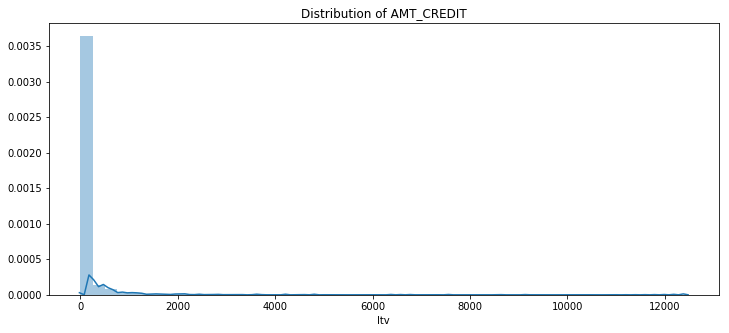

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(useful_data["ltv"], hist = True)

looks like a log-normal ditribution, let's do some operation

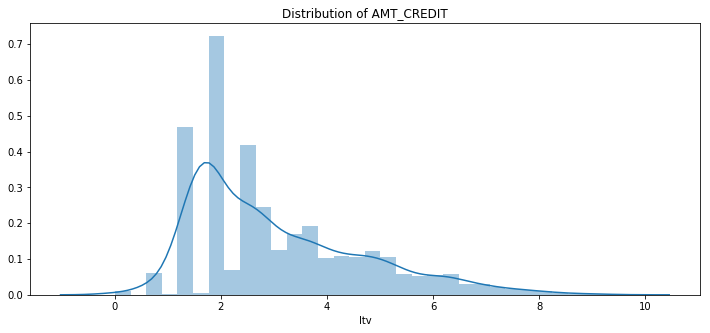

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(np.log1p(useful_data["ltv"]), hist = True)

looks better, let's treat log(lvt+1) as a target in our model

### check the corr

In [19]:
useful_data['log_ltv'] = useful_data["ltv"].apply(lambda x: np.log1p(x))
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
corr = useful_data.corr()
data = [
    go.Heatmap(
        z= corr.values,
        x=useful_data.columns.values,
        y=useful_data.columns.values,
        reversescale = False,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
margin=dict(
    l=240,
),)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

/home/jacob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# list some features may need to be removed
toRemove = ['alliance_power', 'alliance_territory', 'realm_chat_sent']

### Modeling

Use ridge as a start to model

use cross validation to avoid overfitting

use r^2 to evaluate

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def train(random_state):
    X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.4, random_state=random_state)
    ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=False, max_iter=None, tol=0.001, solver='auto', random_state=None)
    ridge.fit(X_train, y_train)
    # R^2
    return ridge.score(X_test, y_test)

def cv(random_state_list):
    score = 0
    for random_state in random_state_list:
        score += train(random_state)
    return score / len(random_state_list)

In [22]:
y = useful_data['log_ltv']
X = useful_data.drop(['log_ltv', 'ltv'], axis = 1)
X.fillna(X.mean(), inplace = True)

seeds = [40, 7, 17, 80, 2018, 831, 723, 666, 815]
cv(seeds)

0.347162913647072

In [23]:
y = useful_data['log_ltv']
X = useful_data.drop(['log_ltv', 'ltv'], axis = 1)
X = X.drop(toRemove, axis = 1)
X.fillna(X.mean(), inplace = True)

seeds = [40, 7, 17, 80, 2018, 831, 723, 666, 815]
cv(seeds)

0.3473885423524133

after remove low corr features 'alliance_power', 'alliance_territory', 'realm_chat_sent', 

the r^2 is a little improved.